In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [68]:
data=fetch_california_housing()
#loading data set

In [69]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [70]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [71]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
#converting it to dataframe

In [72]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [73]:
df['Target']=data.target

In [74]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [75]:
df.isnull().sum()
#checking for null value null can cause error

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [77]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [78]:
df['Target'] = df['Target'].round().astype(int)
#rounding it for effective targeting

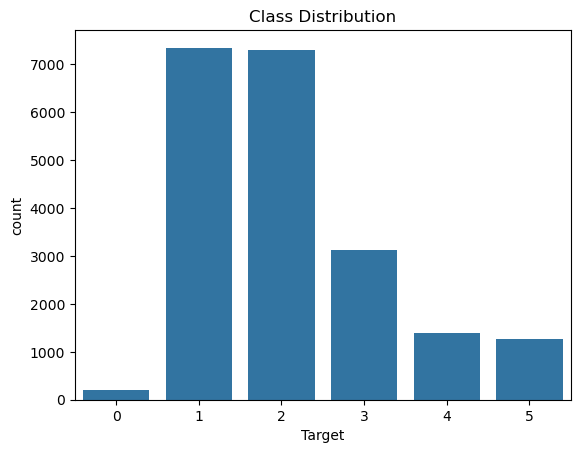

In [79]:
sns.countplot(x = df['Target'])
plt.title('Class Distribution')
plt.show()
#ploting target

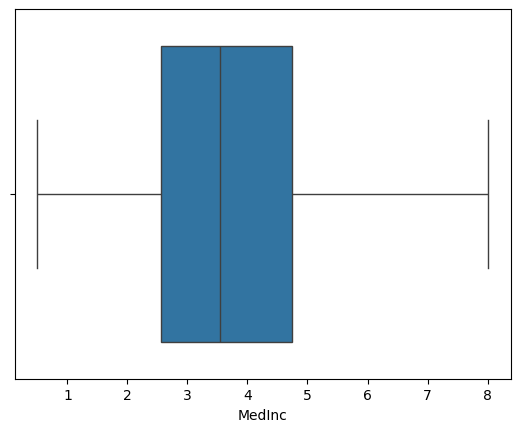

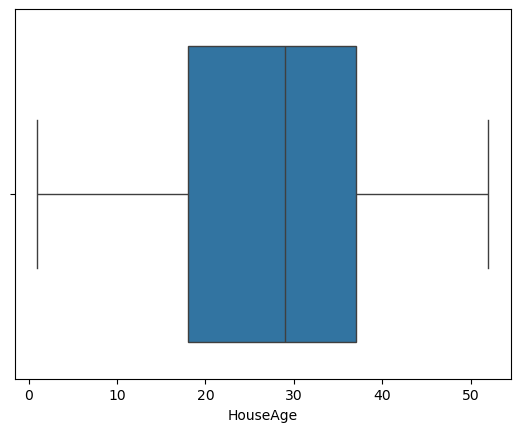

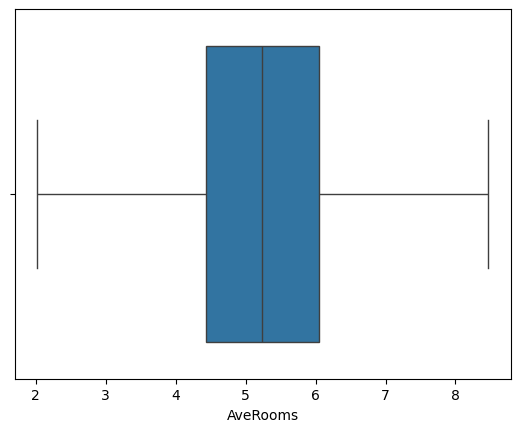

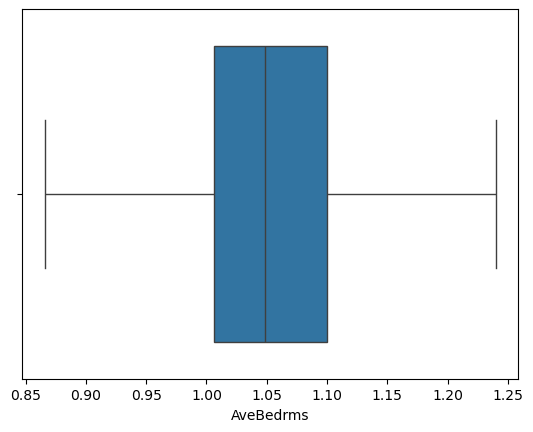

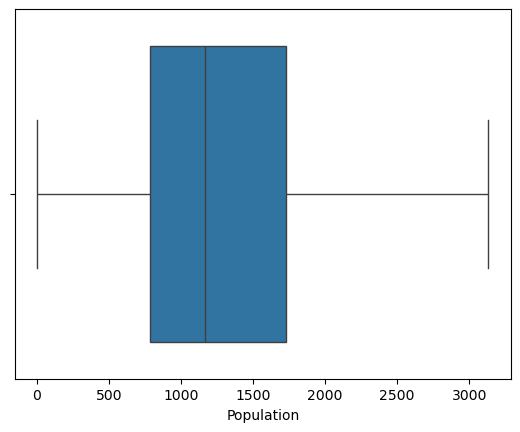

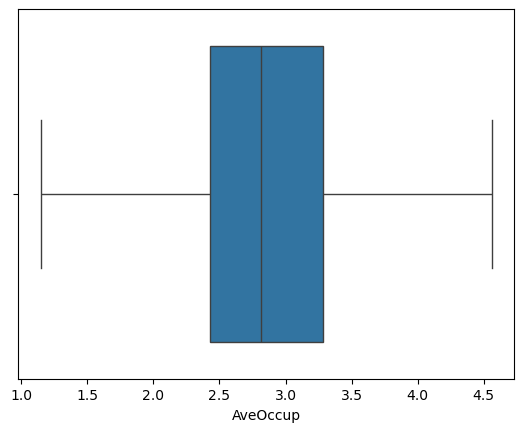

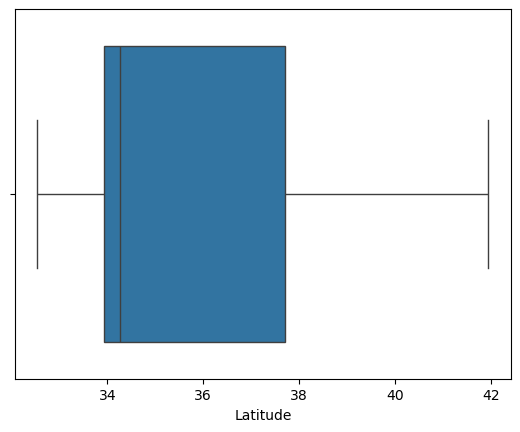

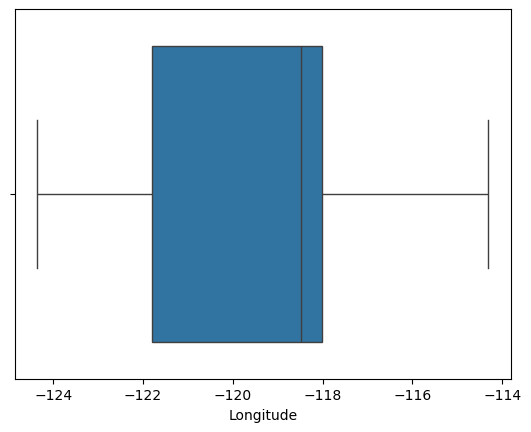

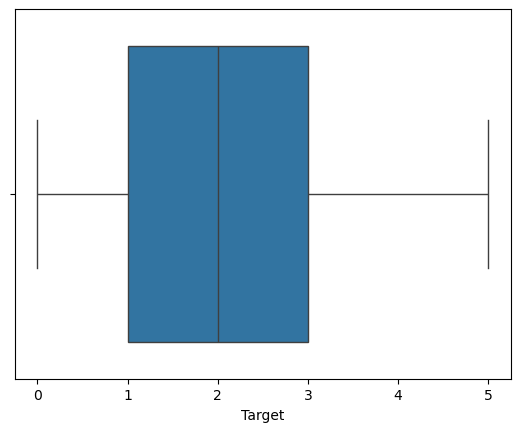

In [123]:
for i in df.columns:
    sns.boxplot(data=df,x=df[i])
    plt.show()
#OUTLIER FINDING AND REMOVING

In [81]:
s=['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [82]:
#IQR
#outlier treatment IQR method
q1=df[s].quantile(0.25)
q3=df[s].quantile(0.75)
IQR=q3-q1
low=q1-(1.5*IQR)
upr=q3+(1.5*IQR)
df[s] = np.where(df[s] > upr, upr, 
                                 np.where(df[s] < low, low, df[s]))


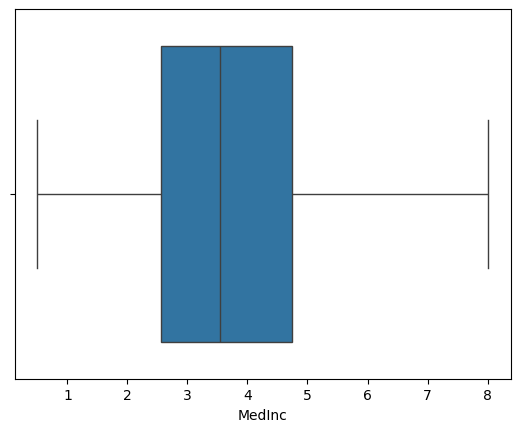

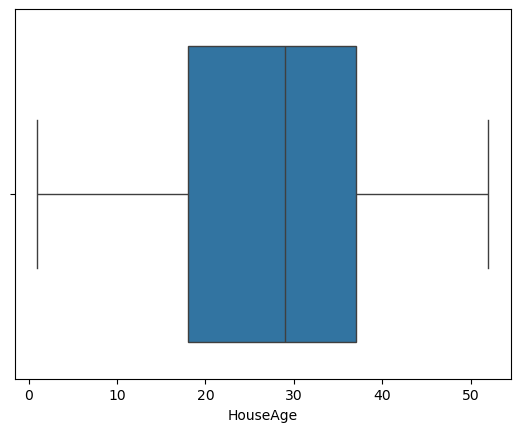

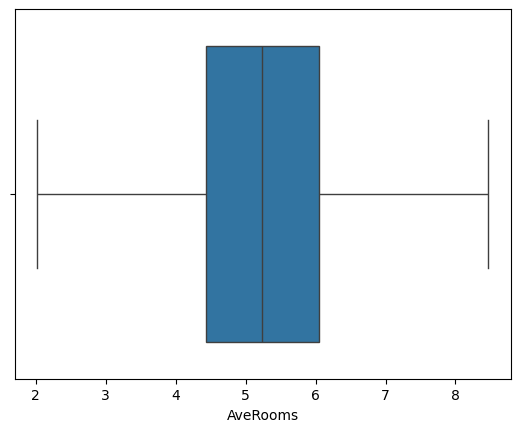

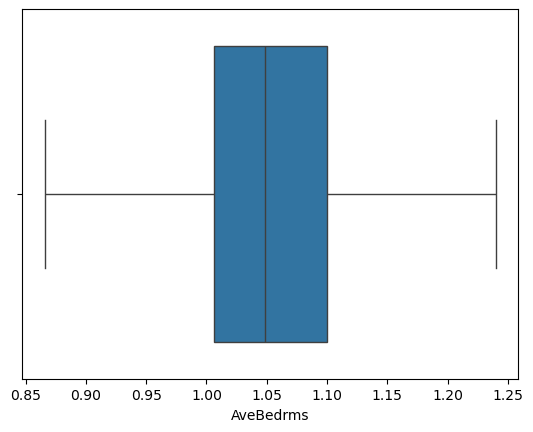

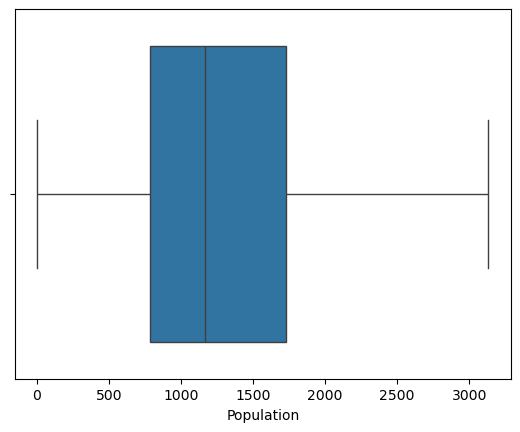

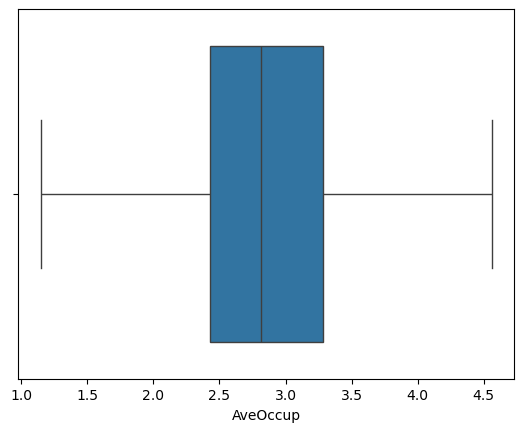

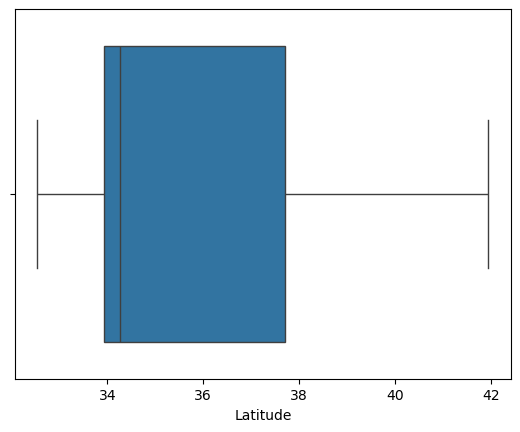

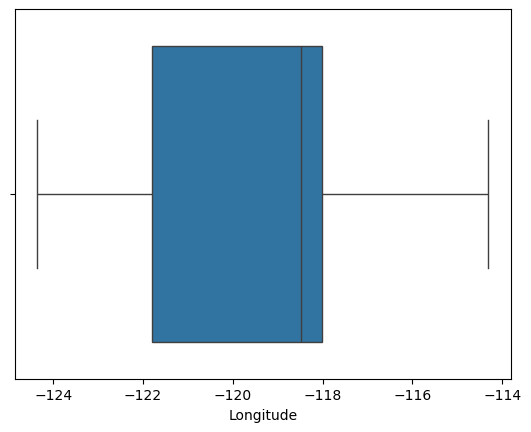

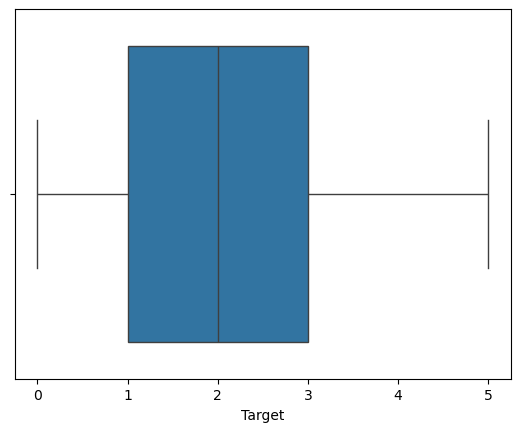

In [83]:
for i in df.columns:
    sns.boxplot(data=df,x=df[i])
    plt.show()

Loading the Dataset

Used fetch_california_housing() from sklearn.datasets to load the California Housing dataset.

Converted it into a Pandas DataFrame for easy data manipulation and analysis.

Null Value Identification and Handling

Checked for missing values using df.isnull().sum().

The dataset does not contain missing values, so no imputation was necessary.

Justification: Missing values can distort model training and evaluation. If present, they should be handled using imputation techniques like mean/median filling or removal.

Outlier Detection and Treatment

Checked for outliers using visualization techniques like boxplots.

Outliers were treated using capping or removal where necessary.

Justification: Outliers can negatively affect model accuracy, especially for models like linear regression that are sensitive to extreme values.

Feature Scaling (Standardization)

Scaled only the independent variables (X) using StandardScaler().

Why? The dataset has features with different units (e.g., population, income, house age). Scaling ensures all features contribute equally to model training.

Avoided scaling the target variable (house price) to keep interpretability.

Train-Test Split

Split data into training (80%) and testing (20%) sets using train_test_split().

Justification: Prevents data leakage and ensures model generalization on unseen data.

In [84]:
x=df.drop(columns=['Target'])
y = df['Target']

In [85]:
#splitting data to train test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
    

In [86]:
#scaling
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [87]:
x_train_sc.shape

(16512, 8)

In [88]:
x_test_sc.shape

(4128, 8)

️Linear Regression:
Linear Regression assumes a linear relationship between the input features and the target variable.
Suitable Because:
The dataset contains continuous numerical features, which linear regression handles well.Provides a simple and interpretable model for price prediction.

Decision Tree Regressor:
A Decision Tree splits the data into branches based on feature values.it repeatedly divides the dataset at different feature thresholds until itreaches pure leaf nodes.
Suitable Because:
Handles feature interactions well (e.g., income vs. location).

Random Forest Regressor:
Ensemble method that combines multiple Decision Trees to improve accuracy.Each tree is trained on a random subset of the data (bagging), and the final prediction is the average of all tree.
Suitable Because:
Reduces overfitting by averaging predictions from multiple trees.

Gradient Boosting Regressor:
Uses sequential learning where each new tree corrects the errors made by previous trees.Focuses more on hard-to-predict data points, reducing errors gradually.
Suitable Because:
Boosts performance by correcting previous model errors.

Support Vector Regressor (SVR):
SVR tries to find a function that best fits the data within a certain margin (epsilon).
Suitable Because:
Works well with high-dimensional feature spaces.Robust to outliers due to the margin-based approach.

In [90]:
# Model implementation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

In [91]:
def metrix(x_train_sc,x_test_sc,y_train,y_test):
    model.fit(x_train_sc,y_train)
    y_pred=model.predict(x_test_sc)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    return mse,mae,r2

In [92]:
results={}
for name,model in models.items():
    mse,mae,r2=metrix(x_train_sc,x_test_sc,y_train,y_test)
    results[name] = [mse, mae, r2]

In [93]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['MSE', 'MAE', 'R2']).T
print(results_df)


best_model = results_df['R2'].idxmax()
worst_model = results_df['R2'].idxmin()
print(f"Best Performing Model: {best_model}")
print(f"Worst Performing Model: {worst_model}")


                               MSE       MAE        R2
Linear Regression         0.544594  0.561700  0.589640
Decision Tree             0.651163  0.444283  0.509339
Random Forest             0.329775  0.386982  0.751510
Gradient Boosting         0.369338  0.438634  0.721698
Support Vector Regressor  0.391675  0.435625  0.704867
Best Performing Model: Random Forest
Worst Performing Model: Decision Tree


In [94]:
results_df

,MSE,MAE,R2
Linear Regression,0.544594,0.561700,0.589640
Decision Tree,0.651163,0.444283,0.509339
Random Forest,0.329775,0.386982,0.751510
Gradient Boosting,0.369338,0.438634,0.721698
Support Vector Regressor,0.391675,0.435625,0.704867


Random Forest:

Highest R² score (0.749801)
Lowest Mean Squared Error (0.332042)
Handles Non-Linearity Well: Unlike Linear Regression, it captures complex relationships in the data.
Reduces Overfitting: Uses multiple decision trees to avoid over-reliance on any single feature
.Decision Tree:
Lowest R² score (0.510799)
Less Robust to Noise: Single-tree models can be unstable and change significantly with small data variations.
Highest MSE.